In [1]:
import requests
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Load in the dataset (you can create the dataset by running the 'create_dataset.py' file)
posts = pd.read_pickle('data/forum-analysis.pkl')

# Which cause areas get the most posts?

AttributeError: 'Figure' object has no attribute 'font'

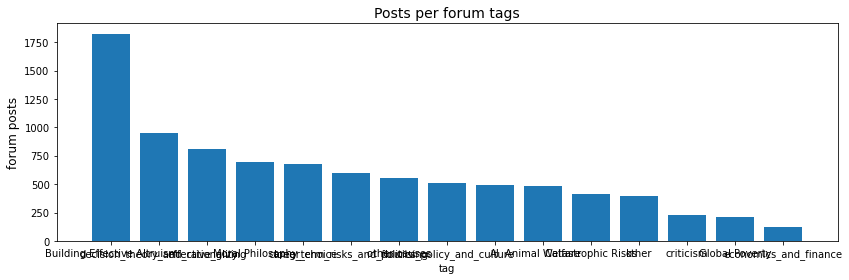

In [11]:
# taken from https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

tags = to_1D(posts["tag_categories"]).value_counts().index
posts_per_tag = to_1D(posts["tag_categories"]).value_counts().values

fig, ax = plt.subplots(figsize = (14,4))
ax.bar(tags,
        posts_per_tag)
ax.set_ylabel("forum posts", size = 12)
ax.set_xlabel("tag")
ax.set_title("Posts per forum tags", size = 14)
ax.update_layout(font=dict(size=30))
fig.autofmt_xdate()# Graph amount of posts with each tag

The first thing that stood out to me, is that there are many more posts on meta subjects such as community building and rationality, than there are posts about specific cause areas. This is maybe not that surprising, as many cause-area specific analyses and reports might be not be posted on the EA Forum, but instead on the websites of the organisations that produce them, whereas there is no better place to share work on community building than the EA forum.

In terms of cause-areas there have been roughly the same number of posts on each cause area (AI, animal welfare, catastrophic risks, and other causes) with the exception of global development which has about half. I think the most likely explanation as for why this is, is that EA global development reports are more likely to be solely published on the websites of the organisations that produce it.

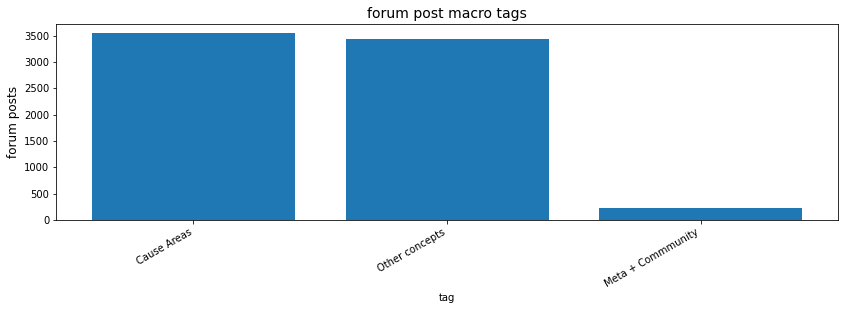

In [5]:
# Graph amount of posts with each macro tag

fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(posts["macro_tag_categories"]).value_counts().index,
        to_1D(posts["macro_tag_categories"]).value_counts().values)
ax.set_ylabel("forum posts", size = 12)
ax.set_xlabel("tag")
ax.set_title("forum post macro tags", size = 14)
fig.autofmt_xdate()

There is roughly an equal split between posts on cause areas and other concepts.

# How has interest in cause-areas changed over time?
The EA Forum has exploded popularity in recent years, which I had expected would result noticable changes to what is posted on the forum. This seems not to be the case, and interest in each area (measured by amount of posts) has largely remained the same.

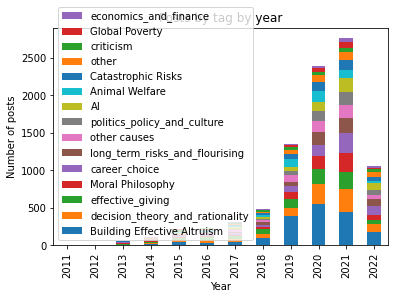

In [6]:
# bar plot with posts by year

# remove posts from before 2011 (post-humous posts)
posts = posts[~(posts['postedAt'].dt.year < 2011)]

# plot posts by year, each bar with tags stacked on top of each other with a different color
years = posts.postedAt.dt.year.value_counts().index
posts_per_year = pd.DataFrame(columns=tags)
for year in years:
    posts_this_year = posts[posts.postedAt.dt.year == year]
    tags_this_year = to_1D(posts_this_year["tag_categories"]).value_counts()
    tags_this_year = tags_this_year.rename(year)
    posts_per_year = posts_per_year.append(tags_this_year)

posts_per_year = posts_per_year.fillna(0)
posts_per_year.sort_index().plot(kind='bar', stacked=True, ylabel='Number of posts', xlabel='Year', legend='reverse', title='Posts by tag by year')

For easier comparison between the years, here is the same plot but normalized

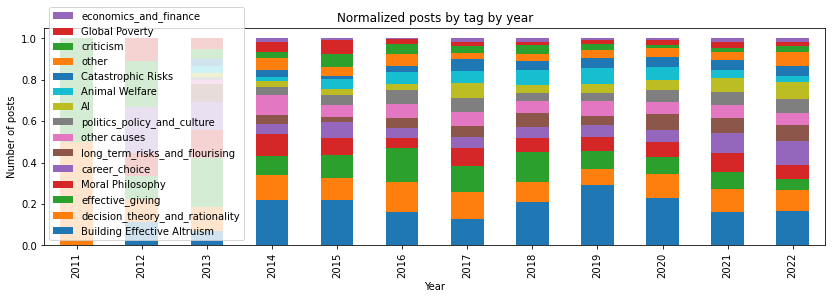

In [7]:
# normalized posts by year 

normalized_posts_per_year = posts_per_year.div(posts_per_year.sum(axis=1), axis=0)

normalized_posts_per_year.sort_index().plot(kind='bar', stacked=True, ylabel='Number of posts', xlabel='Year', figsize=(14,4), legend='reverse', title='Normalized posts by tag by year')

I was surprised to see how little change there have been in the make-up of posts over the years. Global development makes up a smaller percentage of the forum than it did in the early years, but has largely remained the same since 2016. The percentage of posts on animal welfare peaked in 2018-19 and has since decreased somewhat. Interest in AI looks to be going up, as are posts about career choices.

# Which posts get the most engagement?

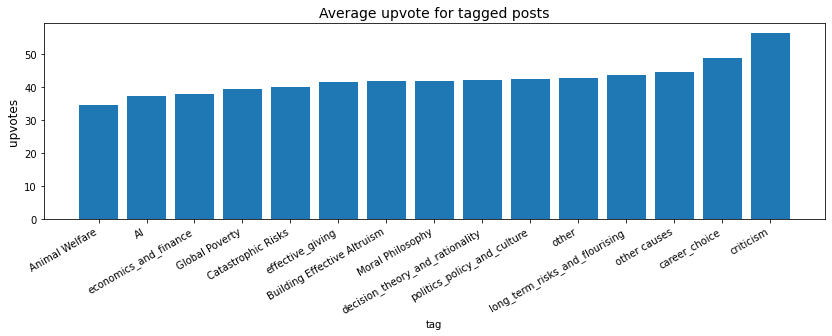

In [8]:
# Avg. upvotes per post

# taken from https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173
def boolean_df(item_lists, unique_items):# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

unique_tags = tags
tags_bool = boolean_df(posts["tag_categories"], unique_tags)

upvotes_per_tag = pd.Series(index=unique_tags, data=0)

# TODO: rewrite to list comprehension
for i in posts.iterrows():
    for tag in posts.loc[i[0]]['tag_categories']:
        upvotes_per_tag[tag] += posts.loc[i[0]]['baseScore']

fig, ax = plt.subplots(figsize = (14,4))
upvotes_per_post = upvotes_per_tag / posts_per_tag
ax.bar(upvotes_per_post.sort_values().index, upvotes_per_post.sort_values())
ax.set_ylabel("upvotes", size = 12)
ax.set_xlabel("tag")
ax.set_title("Average upvote for tagged posts", size = 14)
fig.autofmt_xdate()

Posts criticising EA are on average the most highly upvoted!

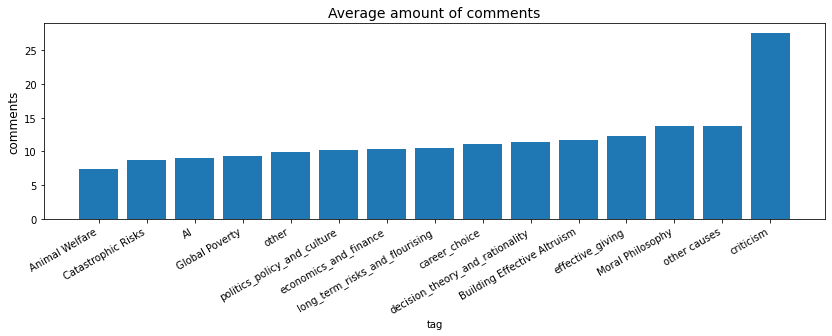

In [9]:
# Average comments on post

posts.commentCount = posts.commentCount.fillna(0)
comments_per_tag = pd.Series(index=unique_tags, data=0)

# TODO: rewrite to list comprehension
for i in posts.iterrows():
    for tag in posts.loc[i[0]]['tag_categories']:
        comments_per_tag[tag] += posts.loc[i[0]]['commentCount']

fig, ax = plt.subplots(figsize = (14,4))
comments_per_post = comments_per_tag / posts_per_tag
ax.bar(comments_per_post.sort_values().index, comments_per_post.sort_values())
ax.set_ylabel("comments", size = 12)
ax.set_xlabel("tag")
ax.set_title("Average amount of comments", size = 14)
fig.autofmt_xdate()

They are also by far the most highly commented posts!

Posts on cause-areas in turn tend to be the least upvoted with the fewest comments. My best guess as to why, is that it is a matter of engagability. It's difficult to provide much input to a deep-dive on some animal welfare issue without being  highly informed on the topic yourself. There is too much of an assymmetry between the knowledge of the author and average reader for these posts to generate a lot comments and debate.

I do think it's a shame that cause-specific posts seem to get less engagement and upvotes. Reading throrough analyses and deep-dives are often the posts I learn the most from, it's a shame that the readership for this content isn't higher.

# EA interests seem largely the same

My main takeway has been that there aren't any clear recent trends in EA I could deduce, at least based on how posts are tagged.

Fluctuation in the amount of posts on each cause-area is within what can be attributed to noise. The different major cause areas get roughly the same level of engagement on the forum. Many of the trends that can be seen, can likely be explained away by noting that the EA Forum is a flawed representation of EA's interests.

Are there any plots I didn't make you would like to see? If so, let me know and I'm probably happy to create them[2] :)